In [62]:
import pandas as pd

df = pd.read_csv('./이상치처리_표준화.csv')

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier import 수정
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # 분류 모델에 맞는 평가 지표 추가
import matplotlib.pyplot as plt
import seaborn as sns

# 종속 변수 설정
y = df['Air_Quality_Status_label']

# 독립 변수 설정
x = df.drop(['측정일시', 'Main_Pollutant', 'Air_Quality_Status', 'Air_Quality_Status_label'], axis=1)

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 분류 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=42)  # RandomForestClassifier로 변경
rf_model.fit(x_train, y_train)

# 예측값 생성
y_pred = rf_model.predict(x_test)

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred)  # 정확도를 사용
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# 특성 중요도 평가
importance = rf_model.feature_importances_
features = x.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 특성 중요도 출력
print("\nFeature importance in descending order:")
print(feature_importance)


Accuracy: 0.999
Confusion Matrix:
[[2584    0    0    0]
 [   0 8202    0    0]
 [   0    2 1698    3]
 [   0    0   13  373]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2584
           1       1.00      1.00      1.00      8202
           2       0.99      1.00      0.99      1703
           3       0.99      0.97      0.98       386

    accuracy                           1.00     12875
   macro avg       1.00      0.99      0.99     12875
weighted avg       1.00      1.00      1.00     12875


Feature importance in descending order:
                 Feature  Importance
59                   CAI    0.605173
13               시정(10m)    0.041434
18         30cm 지중온도(°C)    0.027465
60  Main_Pollutant_label    0.023355
4                  습도(%)    0.022561
..                   ...         ...
26             간이휴게소(개소)    0.000104
31                기타(개소)    0.000090
53         하이브리드(CNG+전기)    0.000000
27  

### 정확도 1.00 ->  CAI가 종속변수를 만들때 사용한 컬럼이라 과적합 발생했다고 예상<br>
CAI 컬럼 독립변수에서 제외 후 다시 RandomForest 시행

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier import 수정
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # 분류 모델에 맞는 평가 지표 추가
import matplotlib.pyplot as plt
import seaborn as sns

# 종속 변수 설정
y = df['Air_Quality_Status_label']

# 독립 변수 설정
x = df.drop(['CAI', '측정일시', 'Main_Pollutant', 'Air_Quality_Status', 'Air_Quality_Status_label'], axis=1)

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 분류 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=42)  # RandomForestClassifier로 변경
rf_model.fit(x_train, y_train)

# 예측값 생성
y_pred = rf_model.predict(x_test)

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred)  # 정확도를 사용
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# 특성 중요도 평가
importance = rf_model.feature_importances_
features = x.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 특성 중요도 출력
print("\nFeature importance in descending order:")
print(feature_importance)



Accuracy: 0.869
Confusion Matrix:
[[1847  737    0    0]
 [ 250 7838  111    3]
 [   0  491 1192   20]
 [   0   18   60  308]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      2584
           1       0.86      0.96      0.91      8202
           2       0.87      0.70      0.78      1703
           3       0.93      0.80      0.86       386

    accuracy                           0.87     12875
   macro avg       0.89      0.79      0.83     12875
weighted avg       0.87      0.87      0.86     12875


Feature importance in descending order:
                 Feature  Importance
13               시정(10m)    0.083645
18         30cm 지중온도(°C)    0.064278
4                  습도(%)    0.058240
17         20cm 지중온도(°C)    0.054278
0                 기온(°C)    0.053096
6              이슬점온도(°C)    0.051054
5               증기압(hPa)    0.049904
8              해면기압(hPa)    0.049201
7              현지기압(hPa)    0.048985
16  

C:\Users\Home\AppData\Local\Temp\ipykernel_19252\127352310.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


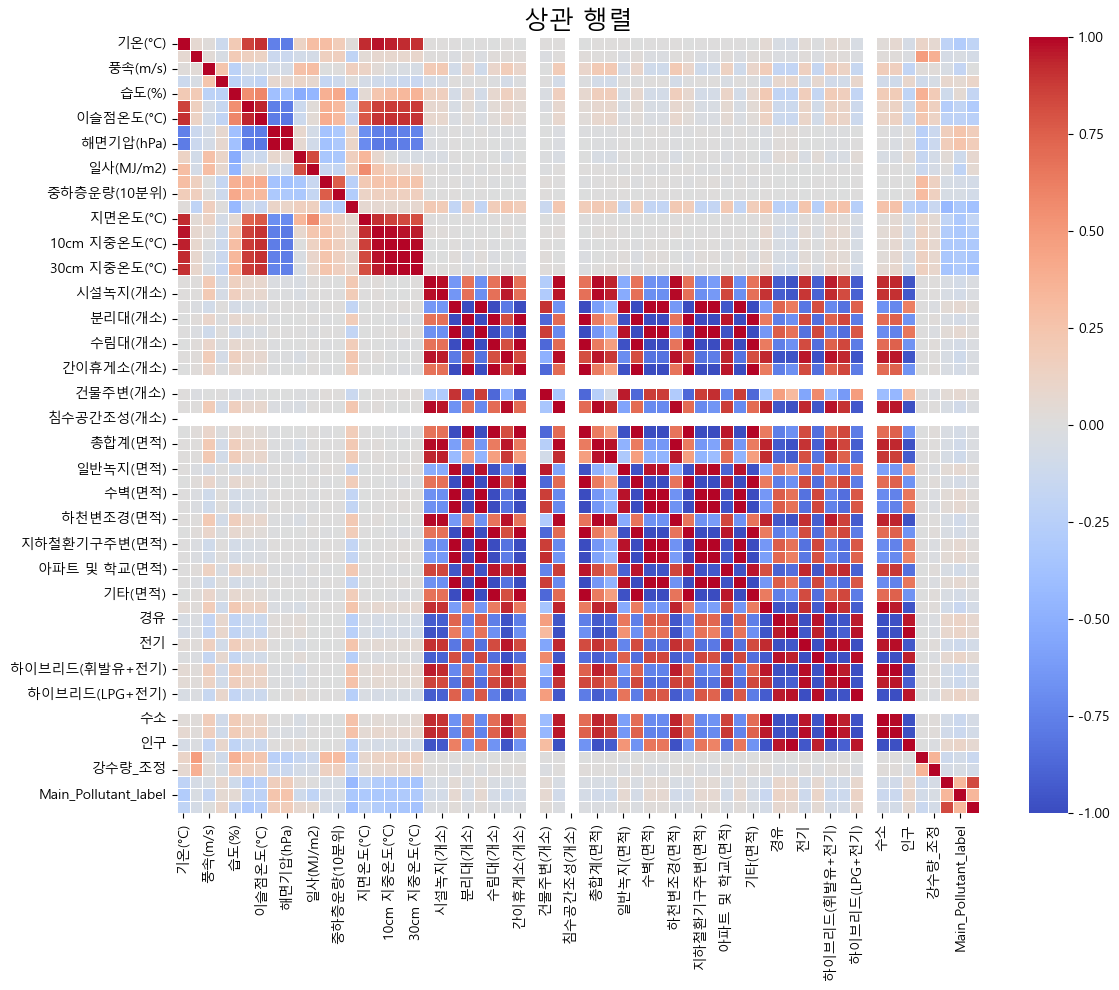

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관 행렬 계산
corr_matrix = df.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 10))  # 그림 크기 조정
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('상관 행렬', fontsize=18)  # 제목 설정 및 폰트 크기 조정
plt.tight_layout()  # 레이아웃 최적화
plt.show()


Number of features to reach 90% cumulative importance: 23


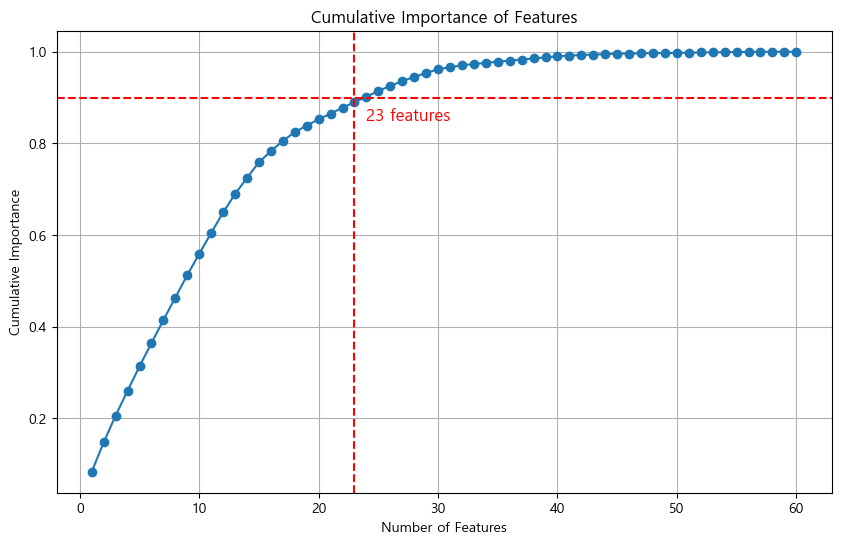

In [66]:
# 누적 중요도 계산
feature_importance['Cumulative Importance'] = feature_importance['Importance'].cumsum()

# 누적 중요도가 90%에 도달하는 특성 개수 찾기
num_features_90 = (feature_importance['Cumulative Importance'] <= 0.9).sum()

# 결과 출력
print(f'\nNumber of features to reach 90% cumulative importance: {num_features_90}')

# 특성 개수에 따른 누적 중요도 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance) + 1), feature_importance['Cumulative Importance'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=num_features_90, color='r', linestyle='--')
plt.text(num_features_90 + 1, 0.85, f'{num_features_90} features', color='red', fontsize=12)
plt.show()

In [67]:
sel_feature = feature_importance.head(23)['Feature'].tolist()
sel_feature
df_nu = pd.concat([df[sel_feature], df['Air_Quality_Status_label']], axis=1)
df_nu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   시정(10m)                   42916 non-null  float64
 1   30cm 지중온도(°C)             42916 non-null  float64
 2   습도(%)                     42916 non-null  float64
 3   20cm 지중온도(°C)             42916 non-null  float64
 4   기온(°C)                    42916 non-null  float64
 5   이슬점온도(°C)                 42916 non-null  float64
 6   증기압(hPa)                  42916 non-null  float64
 7   해면기압(hPa)                 42916 non-null  float64
 8   현지기압(hPa)                 42916 non-null  float64
 9   10cm 지중온도(°C)             42916 non-null  float64
 10  지면온도(°C)                  42916 non-null  float64
 11  5cm 지중온도(°C)              42916 non-null  float64
 12  Main_Pollutant_label      42916 non-null  int64  
 13  풍향(16방위)                  42916 non-null  float64
 14  풍속(m/s

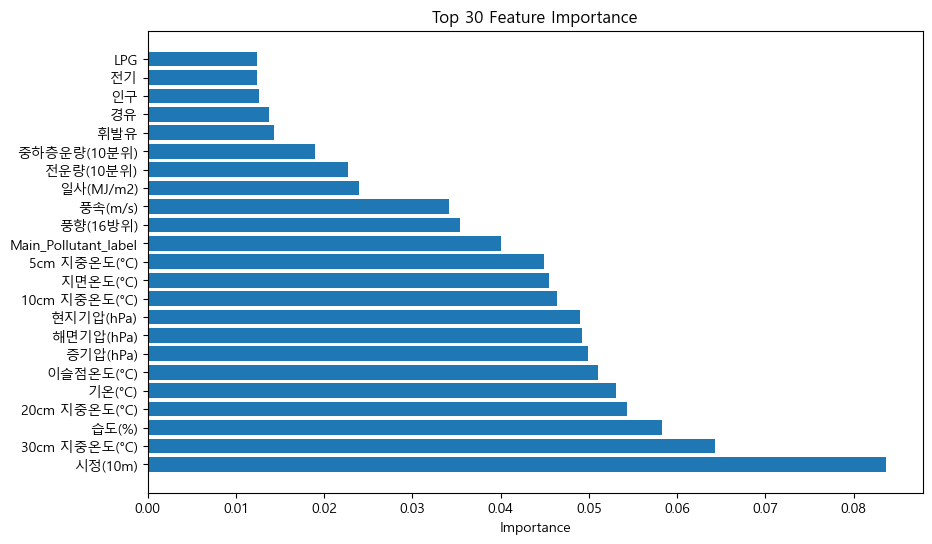

In [60]:
# 특성 중요도 시각화 (상위 30개 특성)
top_features = feature_importance.head(23)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.show()


In [79]:
# Prepare the data
X = df_nu.drop(['Air_Quality_Status_label'], axis=1)
y = df['Air_Quality_Status_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## 단순로직 부스팅 - AdaBoost

In [80]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])

print(report)
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

          좋음       0.41      0.42      0.42      1706
          보통       0.72      0.77      0.74      5493
          나쁨       0.56      0.36      0.43      1142
        매우나쁨       0.52      0.49      0.51       243

    accuracy                           0.64      8584
   macro avg       0.55      0.51      0.53      8584
weighted avg       0.63      0.64      0.63      8584

Training time: 4.08 seconds
Prediction time: 0.11 seconds


## 경사하강법  + Boosting -> Gradient Boosting
결과) Gradient descent를 통해 잔차가 감소되어 정확도가 향상되었다
<br>오분류 가중치에 가중을 두는 Ada와 다르게 직전 단계의 오차를 학습해 확률값을 추정하는 Gradient Boosting이 더 높은 정확도를 보여준다

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


# Initialize the Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])

print(report)
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

              precision    recall  f1-score   support

          좋음       0.76      0.50      0.61      2584
          보통       0.77      0.92      0.84      8202
          나쁨       0.68      0.43      0.52      1703
        매우나쁨       0.79      0.55      0.65       386

    accuracy                           0.76     12875
   macro avg       0.75      0.60      0.65     12875
weighted avg       0.76      0.76      0.74     12875

Training time: 34.90 seconds
Prediction time: 0.08 seconds


## XGboost
정형화된 데이터 분류에 성능 좋은 XGBoost 수행
<br>확인) 일반화 성능 강화와 학습 효율 향상

In [81]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Initialize the XGBoost classifier
model = XGBClassifier(eval_metric='mlogloss', n_estimators=100, max_depth=3)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])

print(report)
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

              precision    recall  f1-score   support

          좋음       0.76      0.57      0.65      1706
          보통       0.79      0.91      0.85      5493
          나쁨       0.71      0.49      0.58      1142
        매우나쁨       0.78      0.65      0.71       243

    accuracy                           0.78      8584
   macro avg       0.76      0.65      0.70      8584
weighted avg       0.78      0.78      0.77      8584

Training time: 0.44 seconds
Prediction time: 0.01 seconds


## LightGBM
학습 속도를 높이고 의미있는 정확도의 향상을 볼 수 있는 부스팅 기법을 사용

In [82]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time

# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(metric='multi_logloss', num_class=4)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])

print(report)
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 34332, number of used features: 23
[LightGBM] [Info] Start training from score -1.624611
[LightGBM] [Info] Start training from score -0.440048
[LightGBM] [Info] Start training from score -2.045423
[LightGBM] [Info] Start training from score -3.517256
              precision    recall  f1-score   support

          좋음       0.79      0.62      0.70      1706
          보통       0.82      0.92      0.87      5493
          나쁨       0.78      0.61      0.68      1142
        매우나쁨       0.86      0.73      0.79       243

    accuracy                           0.81      8584
   macro avg       0.81      0.72      0.76      8584
weighted avg       0.81      0.81  

## Catboost
GBM의 과적합을 해결하고 학습 속도 빠른 범주형 변수 자체를 처리하기 위해서 사용(속도 향상도 같이 동반)

In [84]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import time


# Initialize the CatBoost classifier
model = CatBoostClassifier(loss_function='MultiClass', iterations=100, random_seed=42, verbose=0)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])

print(report)
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time: {prediction_time:.2f} seconds")

              precision    recall  f1-score   support

          좋음       0.77      0.62      0.69      1706
          보통       0.82      0.91      0.86      5493
          나쁨       0.74      0.56      0.64      1142
        매우나쁨       0.80      0.67      0.73       243

    accuracy                           0.80      8584
   macro avg       0.78      0.69      0.73      8584
weighted avg       0.80      0.80      0.79      8584

Training time: 0.92 seconds
Prediction time: 0.00 seconds


In [26]:
pip install scikit-learn matplotlib lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## PDP 분석
중요 변수 5개에 대해서 '시정(10m)', '30cm 지중온도(°C)', '습도(%)', '20cm 지중온도(°C)', '기온(°C)' 분석
<br> 오염도가 좋아진다 -> 변수가 올라갈수록 좋음은 올라가고 나쁨은 내려간다.
<br> 시정이 높으면 오염도가 좋아지는 것을 볼 수 있다.
<br> 지중온도가 높으면 오염도가 급격하게 좋아지는 것을 볼 수 있지만 매우 나쁨에 대해선 충분한 설명력을 갖지 못한다.
<br> 습도가 높으면 오염도가 급격하게 낮아지는 것을 볼 수 있다.
<br> 기온이 올라가면 오염도가 올라가는 경향을 볼 수 있다.

              precision    recall  f1-score   support

          좋음       0.77      0.62      0.69      1706
          보통       0.82      0.91      0.86      5493
          나쁨       0.74      0.56      0.64      1142
        매우나쁨       0.80      0.67      0.73       243

    accuracy                           0.80      8584
   macro avg       0.78      0.69      0.73      8584
weighted avg       0.80      0.80      0.79      8584

Top 5 features: ['시정(10m)', '30cm 지중온도(°C)', '습도(%)', '20cm 지중온도(°C)', '기온(°C)']


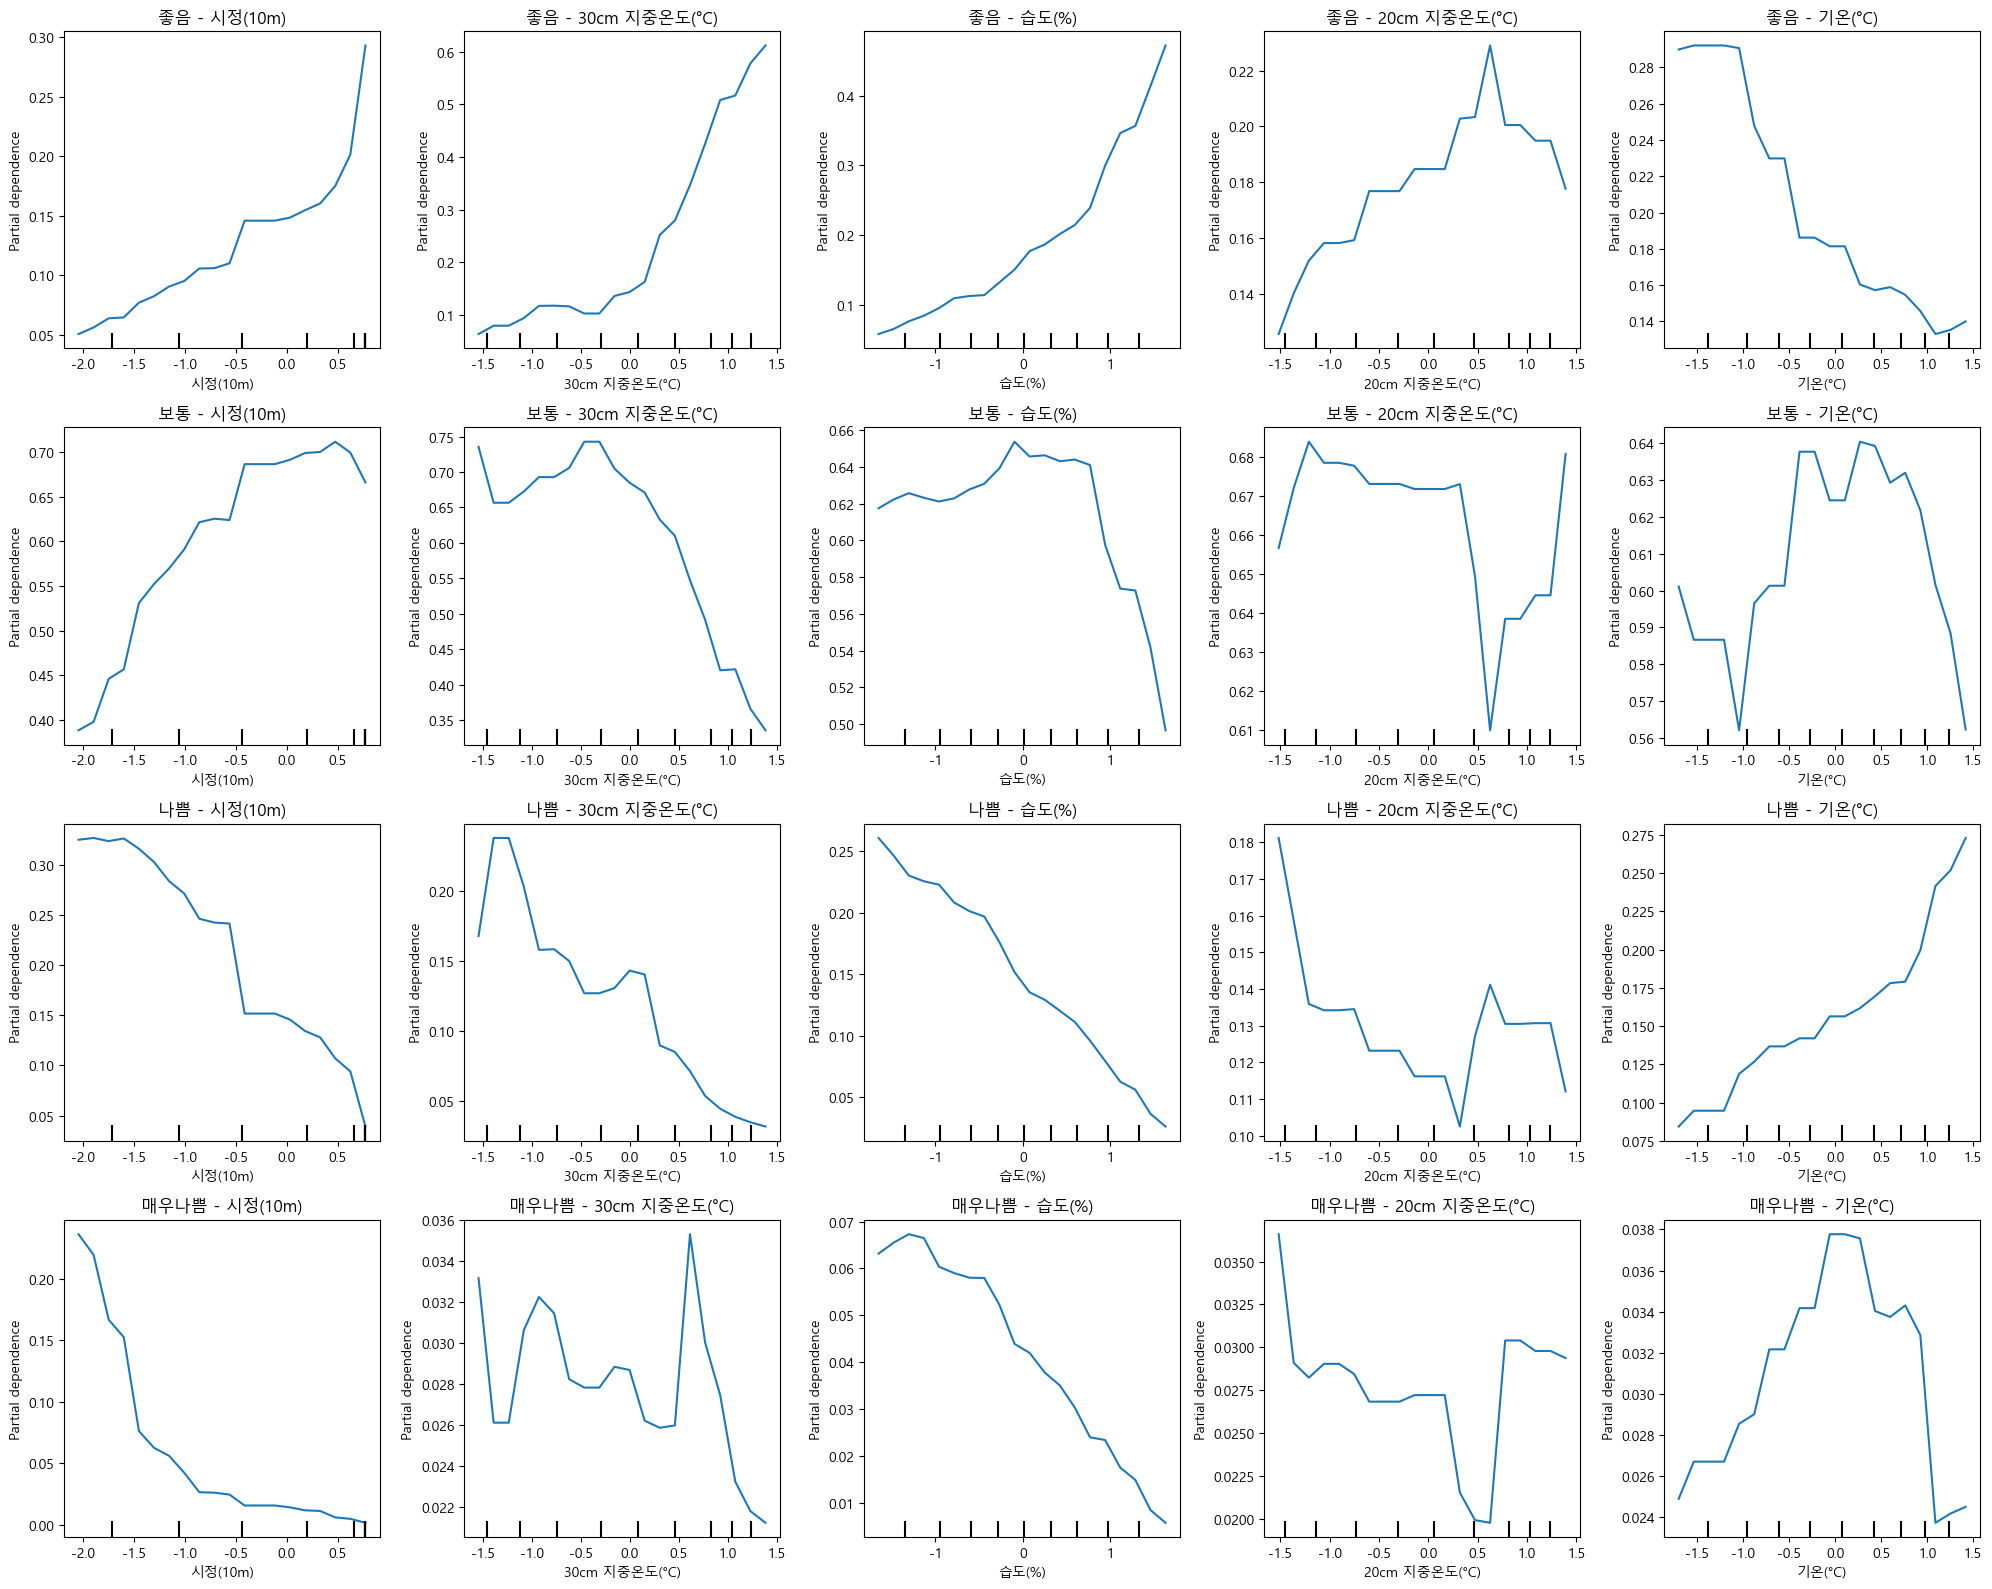

In [85]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])
print(report)


# Get top 5 important features
top_5_features = feature_importance.head(5)['Feature'].tolist()
print(f'Top 5 features: {top_5_features}')

# Class names
class_names = ['좋음', '보통', '나쁨', '매우나쁨']

# Create PDP for each class for top 5 features
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharey=True)

for i in range(4):  # For each class
    for j, feature in enumerate(top_5_features):  # For each top 5 feature
        ax = axes[i, j]
        PartialDependenceDisplay.from_estimator(model, X_train, [feature], target=i, grid_resolution=20, ax=ax)
        ax.set_title(f'{class_names[i]} - {feature}')

plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 34332, number of used features: 23
[LightGBM] [Info] Start training from score -1.624611
[LightGBM] [Info] Start training from score -0.440048
[LightGBM] [Info] Start training from score -2.045423
[LightGBM] [Info] Start training from score -3.517256
              precision    recall  f1-score   support

          좋음       0.79      0.62      0.70      1706
          보통       0.82      0.92      0.87      5493
          나쁨       0.78      0.61      0.68      1142
        매우나쁨       0.86      0.73      0.79       243

    accuracy                           0.81      8584
   macro avg       0.81      0.72      0.76      8584
weighted avg       0.81      0.81  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


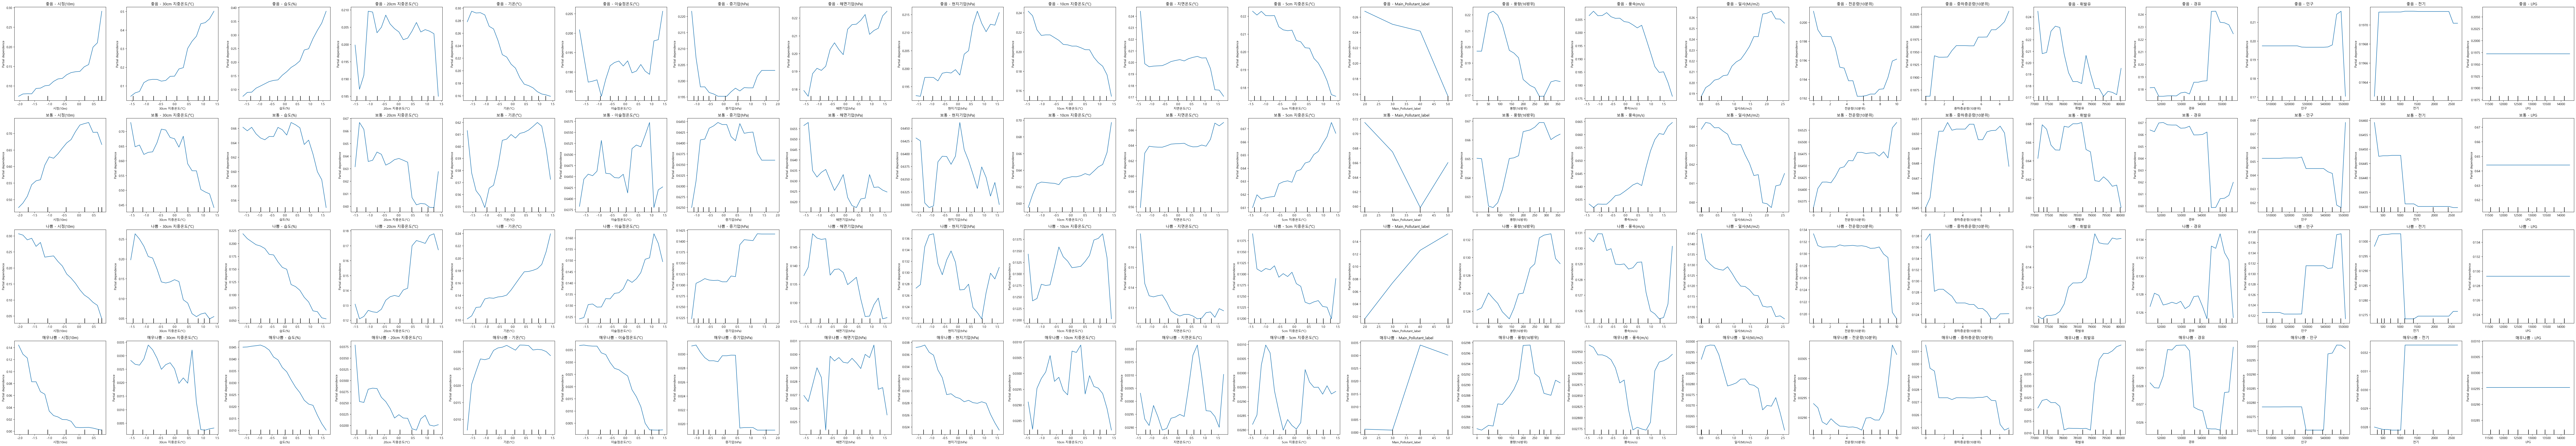

In [90]:
# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(metric='multi_logloss', num_class=4)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])
print(report)

# Get all features
all_features = X.columns.tolist()
print(f'All features: {all_features}')

# Class names
class_names = ['좋음', '보통', '나쁨', '매우나쁨']

# Create PDP for each class for all features
fig, axes = plt.subplots(nrows=4, ncols=len(all_features), figsize=(5 * len(all_features), 20), sharey=True)

for i in range(4):  # For each class
    for j, feature in enumerate(all_features):  # For each feature
        ax = axes[i, j]
        PartialDependenceDisplay.from_estimator(model, X_train, [feature], target=i, grid_resolution=20, ax=ax)
        ax.set_title(f'{class_names[i]} - {feature}')

plt.tight_layout()
plt.show()

## LIME 분석
LIME은 특정 예측에 기여한 주요 변수들을 시각화하고 이해할 수 있다. 
<br>'좋음'과 'NOT 좋음' 예측에 각각 긍정적 또는 부정적인 영향을 미치는 주요 변수들이 무엇인지 확인할 수 있다.
<br> 맨 마지막 그래프 해석
30cm 지중온도(°C) > 0.94 : '좋음' 클래스로 분류되는 데 가장 큰 긍정적 영향을 미침. LIME 값은 약 0.30
<br> 
일사(MJ/m2) <= -0.20: '좋음' 클래스로 분류되지 않도록 부정적 영향을 미침. LIME 값은 약 -0.05

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 34332, number of used features: 23
[LightGBM] [Info] Start training from score -1.624611
[LightGBM] [Info] Start training from score -0.440048
[LightGBM] [Info] Start training from score -2.045423
[LightGBM] [Info] Start training from score -3.517256
              precision    recall  f1-score   support

          좋음       0.79      0.62      0.70      1706
          보통       0.82      0.92      0.87      5493
          나쁨       0.78      0.61      0.68      1142
        매우나쁨       0.86      0.73      0.79       243

    accuracy                           0.81      8584
   macro avg       0.81      0.72      0.76      8584
weighted avg       0.81      0.81  

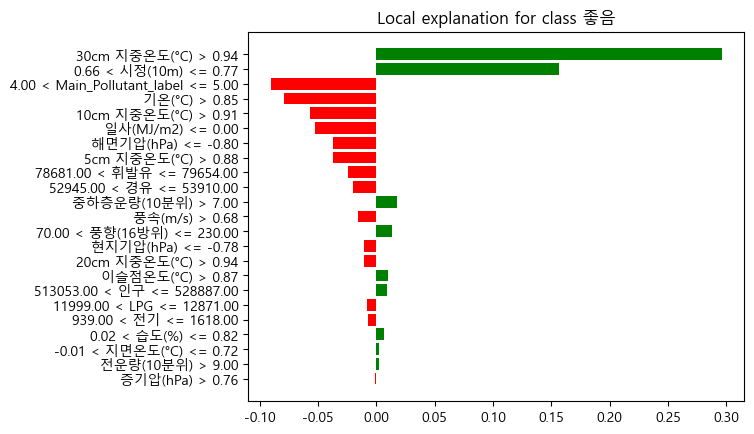

In [87]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt


# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(metric='multi_logloss', num_class=4)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred, target_names=['좋음', '보통', '나쁨', '매우나쁨'])
print(report)

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['좋음', '보통', '나쁨', '매우나쁨'], mode='classification')

# Explain a prediction
i = 0  # Index of the test instance to explain
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=len(X.columns), top_labels=1)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# For plotting the explanation in a script
# Get the top label to explain
top_label = exp.available_labels()[0]
fig = exp.as_pyplot_figure(label=top_label)
plt.show()